#ANALYSIS OF CLINICAL TRIAL DATA BY PAMELA YUSUF @00646995

##DATAFRAME IMPLEMENTATION

In [0]:
#installing necessary visualization software
%pip install bokeh

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# Confirming that files were unzipped and copied successfully
dbutils.fs.ls("FileStore/tables")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1647902342000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1651321833000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1651321813000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1651321741000),
 FileInfo(path='dbfs:/FileStore/tables/devicestatus-1.txt', name='devicestatus-1.txt', size=64124001, modificationTime=1645542732000),
 FileInfo(path='dbfs:/FileStore/tables/devicestatus.zip', name='devicestatus.zip', size=23873574, modificationTime=1645537804000),
 FileInfo(path='dbfs:/FileStore/tables/json_activations-1.zip', name='json_activations-1.zip', size=8411369, modificationTime=1645473471000),
 FileInfo(path='dbfs:/FileStore/t

####Loading the Clinical Trial Data

In [0]:
year = 2021

In [0]:
# storing the clinial trial data in a variable to aid reusability 
clinical_filepath = "/FileStore/tables/clinicaltrial_"+ str(year) + ".csv"

In [0]:
#viewing the first few lines of the file
dbutils.fs.head(clinical_filepath)

[Truncated to first 65536 bytes]
Out[4]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unkn

In [0]:
# Taking a clearer look at the data
for line in dbutils.fs.head(clinical_filepath).splitlines():
    print(line)

[Truncated to first 65536 bytes]
Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions
NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||
NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|
NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|
NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|
NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|
NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate
NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|O

In [0]:
#reading the clinial trial data into a dataframe and checking to see if it was read in correctly
clinical_df = spark.read.option("delimiter", "|").option("header" , "True").option("inferSchema" ,"True").csv(clinical_filepath)
clinical_df.show(10)

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
clinical_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



In [0]:
#Taking a broad look at the clinical trial data
clinical_df.display()

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


##ANALYSING THE DATA

###Problem Statement 1 - Obtaining the number of distinct studies in the dataset

In [0]:
# Selecting the distinct rows and counting them
no_of_distinct_studies = clinical_df.distinct().count()
no_of_distinct_studies

Out[9]: 387261

###Problem Statement 2 - Listing all the types of studies in the data set along with their frequencies

In [0]:
#Grouping the data by trials, counting frequencies, then sorting from most frequent to least frequent
types_list = clinical_df.groupBy('Type').count().sort('count', ascending=False)
types_list.show(truncate = False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



###Problem Statement 3 - Displaying the top 5 conditions with their frequencies

In [0]:
#viewing the conditions column
clinical_df.select("Conditions").show(truncate = False)

+-----------------------------------------------------------------------------------------------------+
|Conditions                                                                                           |
+-----------------------------------------------------------------------------------------------------+
|null                                                                                                 |
|Autistic Disorder,Autism Spectrum Disorder                                                           |
|Diabetes Mellitus                                                                                    |
|Tuberculosis,Lung Diseases,Pulmonary Disease                                                         |
|Diverticular Diseases,Diverticulum,Diverticulosis                                                    |
|Asthma                                                                                               |
|Hypoventilation                                                

In [0]:
#splitting the conditions column row by row in order for it to be exploded
from pyspark.sql.functions import split
splitDF = clinical_df.withColumn('Conditions', split(clinical_df["Conditions"], ","))
splitDF.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|[Autistic Disorde...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016| [Diabetes Mellitus]|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
#exploding the split array
from pyspark.sql.functions import explode
explodedDF = splitDF.withColumn('Conditions', explode(splitDF["Conditions"]))
explodedDF.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|   Autistic Disorder|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autism Spectrum D...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
#grouping and counting the exploded conditions (and then displaying from most frequent to least frequent for better view)
explodedDF.groupBy('Conditions').count().sort('count', ascending=False).show(5)

+-----------------+-----+
|       Conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



###Problem Statement 4 - The 5 most frequent roots

####Loading the Mesh Data

In [0]:
#viwing the first few lines 
dbutils.fs.head("/FileStore/tables/mesh.csv")

[Truncated to first 65536 bytes]
Out[15]: 'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen, Acute",C23.888.592.612.054.200\r\n"Abdomen, Acute",C23.888.821.030.249\r\nAbdominal Injuries,C26.017\r\nAbdominal Neoplasms,C04.588.033\r\nAbdominal Muscles,A02.633.567.050\r\nCremaster Muscle,A02.633.567.050\r\nPyramidalis Muscle,A02.633.567.050\r\nQuadratus Abdominis,A02.633.567.050\r\nTransversus Abdominis,A02.633.567.050\r\nAbducens Nerve,A08.800.800.120.030\r\nAbelson murine leukemia virus,B04.613.807.375.525.020\

In [0]:
#looking at the data more clearly
for line in dbutils.fs.head("/FileStore/tables/mesh.csv").splitlines():
    print(line)

[Truncated to first 65536 bytes]
term,tree
Calcimycin,D03.633.100.221.173
A-23187,D03.633.100.221.173
Temefos,D02.705.400.625.800
Temefos,D02.705.539.345.800
Temefos,D02.886.300.692.800
Abate,D02.705.400.625.800
Abate,D02.705.539.345.800
Abate,D02.886.300.692.800
Difos,D02.705.400.625.800
Difos,D02.705.539.345.800
Difos,D02.886.300.692.800
Abattoirs,J01.576.423.200.700.100
Abattoirs,J03.540.020
Abbreviations as Topic,L01.559.598.400.556.131
Acronyms as Topic,L01.559.598.400.556.131
Abdomen,A01.923.047
"Abdomen, Acute",C23.888.592.612.054.200
"Abdomen, Acute",C23.888.821.030.249
Abdominal Injuries,C26.017
Abdominal Neoplasms,C04.588.033
Abdominal Muscles,A02.633.567.050
Cremaster Muscle,A02.633.567.050
Pyramidalis Muscle,A02.633.567.050
Quadratus Abdominis,A02.633.567.050
Transversus Abdominis,A02.633.567.050
Abducens Nerve,A08.800.800.120.030
Abelson murine leukemia virus,B04.613.807.375.525.020
Abelson murine leukemia virus,B04.820.650.375.525.020
Abetalipoproteinemia,C16.320.565.398.

In [0]:
# reading the mesh data into a dataframe and checking to see if it was read in correctly
mesh_df = spark.read.option("delimiter", ",").csv( "/FileStore/tables/mesh.csv", header = True , inferSchema = True)
mesh_df.show(10)
mesh_df.printSchema()

+----------+-------------------+
|      term|               tree|
+----------+-------------------+
|Calcimycin|D03.633.100.221.173|
|   A-23187|D03.633.100.221.173|
|   Temefos|D02.705.400.625.800|
|   Temefos|D02.705.539.345.800|
|   Temefos|D02.886.300.692.800|
|     Abate|D02.705.400.625.800|
|     Abate|D02.705.539.345.800|
|     Abate|D02.886.300.692.800|
|     Difos|D02.705.400.625.800|
|     Difos|D02.705.539.345.800|
+----------+-------------------+
only showing top 10 rows

root
 |-- term: string (nullable = true)
 |-- tree: string (nullable = true)



In [0]:
#extracting the root from the tree using substring to create root column
meshrootDF = mesh_df.withColumn("root", mesh_df.tree.substr(1,3))
meshrootDF.show()

+--------------------+--------------------+----+
|                term|                tree|root|
+--------------------+--------------------+----+
|          Calcimycin| D03.633.100.221.173| D03|
|             A-23187| D03.633.100.221.173| D03|
|             Temefos| D02.705.400.625.800| D02|
|             Temefos| D02.705.539.345.800| D02|
|             Temefos| D02.886.300.692.800| D02|
|               Abate| D02.705.400.625.800| D02|
|               Abate| D02.705.539.345.800| D02|
|               Abate| D02.886.300.692.800| D02|
|               Difos| D02.705.400.625.800| D02|
|               Difos| D02.705.539.345.800| D02|
|               Difos| D02.886.300.692.800| D02|
|           Abattoirs|J01.576.423.200.7...| J01|
|           Abattoirs|         J03.540.020| J03|
|Abbreviations as ...|L01.559.598.400.5...| L01|
|   Acronyms as Topic|L01.559.598.400.5...| L01|
|             Abdomen|         A01.923.047| A01|
|      Abdomen, Acute|C23.888.592.612.0...| C23|
|      Abdomen, Acut

In [0]:
#creating a dataframe containing the columns needed from the mesh data for problem analysis
termrootDF = meshrootDF.select("term" , "root")
termrootDF.show()

+--------------------+----+
|                term|root|
+--------------------+----+
|          Calcimycin| D03|
|             A-23187| D03|
|             Temefos| D02|
|             Temefos| D02|
|             Temefos| D02|
|               Abate| D02|
|               Abate| D02|
|               Abate| D02|
|               Difos| D02|
|               Difos| D02|
|               Difos| D02|
|           Abattoirs| J01|
|           Abattoirs| J03|
|Abbreviations as ...| L01|
|   Acronyms as Topic| L01|
|             Abdomen| A01|
|      Abdomen, Acute| C23|
|      Abdomen, Acute| C23|
|  Abdominal Injuries| C26|
| Abdominal Neoplasms| C04|
+--------------------+----+
only showing top 20 rows



In [0]:
#creating a dataframe containing the columns needed from the clinical trial data for problem analysis
explodedConditions = explodedDF.select('Conditions')
explodedConditions.show()

+--------------------+
|          Conditions|
+--------------------+
|   Autistic Disorder|
|Autism Spectrum D...|
|   Diabetes Mellitus|
|        Tuberculosis|
|       Lung Diseases|
|   Pulmonary Disease|
|Diverticular Dise...|
|        Diverticulum|
|      Diverticulosis|
|              Asthma|
|     Hypoventilation|
|            Lymphoma|
|            Myositis|
|   Diabetes Mellitus|
|        Hypertension|
|Periodontal Diseases|
|   Diabetes Mellitus|
|        Appendicitis|
|       Stomach Ulcer|
| Cholecystolithiasis|
+--------------------+
only showing top 20 rows



In [0]:
#Joining the two dataframes using inner join
joinedDF = explodedConditions.join(termrootDF,explodedConditions.Conditions == termrootDF.term)
joinedDF.show()

+--------------------+--------------------+----+
|          Conditions|                term|root|
+--------------------+--------------------+----+
|   Autistic Disorder|   Autistic Disorder| F03|
|Autism Spectrum D...|Autism Spectrum D...| F03|
|   Diabetes Mellitus|   Diabetes Mellitus| C19|
|   Diabetes Mellitus|   Diabetes Mellitus| C18|
|        Tuberculosis|        Tuberculosis| C01|
|       Lung Diseases|       Lung Diseases| C08|
|Diverticular Dise...|Diverticular Dise...| C06|
|        Diverticulum|        Diverticulum| C23|
|        Diverticulum|        Diverticulum| C06|
|      Diverticulosis|      Diverticulosis| C23|
|      Diverticulosis|      Diverticulosis| C06|
|              Asthma|              Asthma| C20|
|              Asthma|              Asthma| C08|
|              Asthma|              Asthma| C08|
|              Asthma|              Asthma| C08|
|     Hypoventilation|     Hypoventilation| C23|
|     Hypoventilation|     Hypoventilation| C08|
|            Lymphom

In [0]:
#Grouping by the root column, counting and sorting 
frequentroots = joinedDF.groupBy('root').count().sort('count', ascending=False)
frequentroots.show(5)

+----+------+
|root| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
+----+------+
only showing top 5 rows



###Problem Statement 5 - Ten most common sponsors that are not pharmacetical companies

####Loading the Pharma Data

In [0]:
#checking the head of the file 
dbutils.fs.head("/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]
Out[23]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
#Taking a look at the first few lines clearly
for line in dbutils.fs.head("/FileStore/tables/pharma.csv").splitlines():
    print(line)

[Truncated to first 65536 bytes]
"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"
"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctor

In [0]:
# reading the pharma data into a dataframe and checking to see if it was read in correctly
pharma_df = spark.read.option("delimiter", ",").csv( "/FileStore/tables/pharma.csv", header = True , inferSchema = True)
pharma_df.show(10)
pharma_df.printSchema()

+--------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+---------------+-----------------------------+------------------+--------------+--------+--------------------+-----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|     Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    Civil/C

In [0]:
#Selecting the column needed from pharma data for analysis
ParentCompanyDF = pharma_df.select("Parent_Company")
ParentCompanyDF.show()

+--------------------+
|      Parent_Company|
+--------------------+
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
| Abbott Laboratories|
|   Johnson & Johnson|
| Abbott Laboratories|
| Abbott Laboratories|
|   Johnson & Johnson|
|   Johnson & Johnson|
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
|              Pfizer|
|              Pfizer|
|Bristol-Myers Squibb|
|               Amgen|
|               Amgen|
|               Amgen|
|Amneal Pharmaceut...|
|     Astellas Pharma|
+--------------------+
only showing top 20 rows



In [0]:
#Selecting the column needed from clinical trial data for analysis
SponsorsDF = clinical_df.select("Sponsor")
SponsorsDF.show()

+--------------------+
|             Sponsor|
+--------------------+
|The University of...|
|     Duke University|
|Universidade Fede...|
|Istanbul Medeniye...|
|University of Rom...|
|Consorzio Futuro ...|
|   Ankara University|
|     Ruijin Hospital|
|Washington Univer...|
|           Orphazyme|
|    Novo Nordisk A/S|
|Daniel Alexandre ...|
|Bulent Ecevit Uni...|
|Institut für Phar...|
|The Third Xiangya...|
|Tel Aviv Medical ...|
|Medicines for Mal...|
|James Cook Univer...|
|Soonchunhyang Uni...|
|Member Companies ...|
+--------------------+
only showing top 20 rows



In [0]:
#Joining the two dataframes using left join
joinedpharmaDF = SponsorsDF.join(ParentCompanyDF,SponsorsDF.Sponsor == ParentCompanyDF.Parent_Company, "left")
joinedpharmaDF.display()

Sponsor,Parent_Company
The University of Hong Kong,null
Duke University,null
Universidade Federal do Rio de Janeiro,null
Istanbul Medeniyet University,null
University of Roma La Sapienza,null
Consorzio Futuro in Ricerca,null
Ankara University,null
Ruijin Hospital,null
Washington University School of Medicine,null
Orphazyme,null


In [0]:
#Extracting the rows that have null values in the joined dataframe, grouping and 
nonpharma_Sponsors = joinedpharmaDF.where("Parent_Company is null")
nonpharma_Sponsors.show()

+--------------------+--------------+
|             Sponsor|Parent_Company|
+--------------------+--------------+
|The University of...|          null|
|     Duke University|          null|
|Universidade Fede...|          null|
|Istanbul Medeniye...|          null|
|University of Rom...|          null|
|Consorzio Futuro ...|          null|
|   Ankara University|          null|
|     Ruijin Hospital|          null|
|Washington Univer...|          null|
|           Orphazyme|          null|
|    Novo Nordisk A/S|          null|
|Daniel Alexandre ...|          null|
|Bulent Ecevit Uni...|          null|
|Institut für Phar...|          null|
|The Third Xiangya...|          null|
|Tel Aviv Medical ...|          null|
|Medicines for Mal...|          null|
|James Cook Univer...|          null|
|Soonchunhyang Uni...|          null|
|Member Companies ...|          null|
+--------------------+--------------+
only showing top 20 rows



In [0]:
#grouping, counting and sorting
common_nonpharma_Sponsors = nonpharma_Sponsors.groupBy('Sponsor').count().sort('count', ascending=False)
common_nonpharma_Sponsors.show(10, truncate = False)

+---------------------------------------+-----+
|Sponsor                                |count|
+---------------------------------------+-----+
|National Cancer Institute (NCI)        |3218 |
|M.D. Anderson Cancer Center            |2414 |
|Assistance Publique - Hôpitaux de Paris|2369 |
|Mayo Clinic                            |2300 |
|Merck Sharp & Dohme Corp.              |2243 |
|Assiut University                      |2154 |
|Novartis Pharmaceuticals               |2088 |
|Massachusetts General Hospital         |1971 |
|Cairo University                       |1928 |
|Hoffmann-La Roche                      |1828 |
+---------------------------------------+-----+
only showing top 10 rows



###Problem 6 - Number of Completed Studies In A Given Year

In [0]:
#Viewing the clinical trial dataframe again
clinical_df.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
#Extracting studies that have been completed
CompletedStudies = clinical_df.select("Completion", "Status")\
                                .filter(clinical_df.Status == "Completed")
CompletedStudies.show()


+----------+---------+
|Completion|   Status|
+----------+---------+
|  Jul 2020|Completed|
|  Jan 2018|Completed|
|  Dec 2014|Completed|
|  Jan 2018|Completed|
|  Jul 2017|Completed|
|  Jan 2021|Completed|
|  Oct 2016|Completed|
|  Dec 2015|Completed|
|  Mar 2016|Completed|
|  May 2019|Completed|
|  Oct 2019|Completed|
|  Apr 2015|Completed|
|  Jan 2016|Completed|
|      null|Completed|
|  Apr 2017|Completed|
|  Nov 2020|Completed|
|  Jul 2017|Completed|
|  Jun 2021|Completed|
|  Mar 2017|Completed|
|  Apr 2018|Completed|
+----------+---------+
only showing top 20 rows



In [0]:
#Seperating the month and the year into two seperate columns
split_completedstudies = CompletedStudies.withColumn("Month", CompletedStudies.Completion.substr(1,3))\
                                         .withColumn("Year", CompletedStudies.Completion.substr(5,8))
split_completedstudies.show()

+----------+---------+-----+----+
|Completion|   Status|Month|Year|
+----------+---------+-----+----+
|  Jul 2020|Completed|  Jul|2020|
|  Jan 2018|Completed|  Jan|2018|
|  Dec 2014|Completed|  Dec|2014|
|  Jan 2018|Completed|  Jan|2018|
|  Jul 2017|Completed|  Jul|2017|
|  Jan 2021|Completed|  Jan|2021|
|  Oct 2016|Completed|  Oct|2016|
|  Dec 2015|Completed|  Dec|2015|
|  Mar 2016|Completed|  Mar|2016|
|  May 2019|Completed|  May|2019|
|  Oct 2019|Completed|  Oct|2019|
|  Apr 2015|Completed|  Apr|2015|
|  Jan 2016|Completed|  Jan|2016|
|      null|Completed| null|null|
|  Apr 2017|Completed|  Apr|2017|
|  Nov 2020|Completed|  Nov|2020|
|  Jul 2017|Completed|  Jul|2017|
|  Jun 2021|Completed|  Jun|2021|
|  Mar 2017|Completed|  Mar|2017|
|  Apr 2018|Completed|  Apr|2018|
+----------+---------+-----+----+
only showing top 20 rows



In [0]:
#Extracting column needed and filtering for concerned year
CompletedStudies_year = split_completedstudies.select("Month" , "Year")\
                                              .filter(split_completedstudies.Year == year)
CompletedStudies_year.show()

+-----+----+
|Month|Year|
+-----+----+
|  Jan|2021|
|  Jun|2021|
|  Mar|2021|
|  Jan|2021|
|  May|2021|
|  Feb|2021|
|  Feb|2021|
|  May|2021|
|  Aug|2021|
|  May|2021|
|  Mar|2021|
|  Feb|2021|
|  May|2021|
|  May|2021|
|  May|2021|
|  Apr|2021|
|  Apr|2021|
|  Aug|2021|
|  Feb|2021|
|  Apr|2021|
+-----+----+
only showing top 20 rows



In [0]:
Monthly_CompletedStudies = CompletedStudies_year.groupby('Month').count().sort("count")
Monthly_CompletedStudies.show()

+-----+-----+
|Month|count|
+-----+-----+
|  Oct|  187|
|  Sep|  528|
|  Aug|  700|
|  Jul|  819|
|  Feb|  934|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jan| 1131|
|  Mar| 1227|
+-----+-----+



In [0]:
from pyspark.sql.functions import col, when

Ordered_Monthly_CompletedStudies = Monthly_CompletedStudies.orderBy(when(col("Month") == "Jan", 1)
           .when(col("Month") == "Feb", 2)
           .when(col("Month") == "Mar", 3)
           .when(col("Month") == "Apr", 4)
           .when(col("Month") == "May", 5)
           .when(col("Month") == "Jun", 6)
           .when(col("Month") == "Jul", 7)
           .when(col("Month") == "Aug", 8)
           .when(col("Month") == "Sep", 9)
           .when(col("Month") == "Oct", 10)
           .when(col("Month") == "Nov", 11)
           .when(col("Month") == "Dec", 12)
           )

In [0]:
Ordered_Monthly_CompletedStudies.show()

+-----+-----+
|Month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



##VISUALIZATIONS

In [0]:
#converting the pyspark dataframe to pandas dataframe to aid plotting
import pandas as pd

###Using Bokeh

In [0]:
Months = list(Ordered_Monthly_CompletedStudies.toPandas()['Month'])

In [0]:
Months

Out[40]: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [0]:
count = list(Ordered_Monthly_CompletedStudies.toPandas()['count'])

In [0]:
count

Out[42]: [1131, 934, 1227, 967, 984, 1094, 819, 700, 528, 187]

In [0]:
import random
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.embed import components, file_html
from bokeh.resources import CDN
from bokeh.palettes import Viridis256

output_file("Monthly_completed_studies.html")

p = figure(x_range= Months, height=400, title="Completed Studies each month for year 2021", 
           toolbar_location=None ,tooltips = [("Month",  "@x"), ("Count" , "@top")])

p.vbar(x=Months, top=count, width=0.9,color = random.sample(Viridis256,10), fill_alpha=.75)

p.xgrid.grid_line_color = None
p.y_range.start = 0

html = file_html(p, CDN, "Completed Studies each month for year 2021")
displayHTML(html)

<!DOCTYPE html>
 
 
 
 
 
 Completed Studies each month for year 2021

###Using Matplotlib

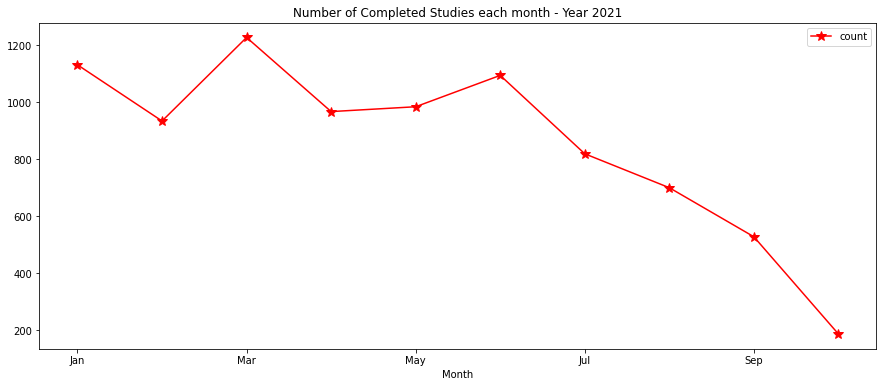

In [0]:
import matplotlib.pyplot as plt

Ordered_Monthly_CompletedStudies.toPandas().plot(x="Month", y="count", kind='line',  marker='*', color='red', ms=10
                                                ,title="Number of Completed Studies each month - Year 2021", figsize=(15, 6))

plt.show()

#FURTHER ANALYSIS

##Exploring the top Interventions

In [0]:
#viewing the interventions column
clinical_df.select("Interventions").show(truncate = False)

+----------------------------------------------------------------------+
|Interventions                                                         |
+----------------------------------------------------------------------+
|null                                                                  |
|null                                                                  |
|null                                                                  |
|null                                                                  |
|null                                                                  |
|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate|
|null                                                                  |
|null                                                                  |
|Vitamins                                                              |
|null                                                                  |
|Liraglutide,Xultophy                              

In [0]:
#splitting the conditions column row by row in order for it to be exploded
from pyspark.sql.functions import split
splitinterventionsDF = clinical_df.withColumn('Interventions', split(clinical_df["Interventions"], ","))
splitinterventionsDF.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
#exploding the split array
from pyspark.sql.functions import explode
explodedinterventionsDF = splitinterventionsDF.withColumn('Interventions', explode(splitinterventionsDF["Interventions"]))
explodedinterventionsDF.show()

+-----------+--------------------+--------------+--------+----------+--------------+----------+-----------------+--------------------+
|         Id|             Sponsor|        Status|   Start|Completion|          Type|Submission|       Conditions|       Interventions|
+-----------+--------------------+--------------+--------+----------+--------------+----------+-----------------+--------------------+
|NCT02757209|Consorzio Futuro ...|     Completed|Apr 2016|  Jan 2018|Interventional|  Apr 2016|           Asthma|         Fluticasone|
|NCT02757209|Consorzio Futuro ...|     Completed|Apr 2016|  Jan 2018|Interventional|  Apr 2016|           Asthma|              Xhance|
|NCT02757209|Consorzio Futuro ...|     Completed|Apr 2016|  Jan 2018|Interventional|  Apr 2016|           Asthma|          Budesonide|
|NCT02757209|Consorzio Futuro ...|     Completed|Apr 2016|  Jan 2018|Interventional|  Apr 2016|           Asthma| Formoterol Fumarate|
|NCT02757209|Consorzio Futuro ...|     Completed|Apr 20

In [0]:
completedinterventions = explodedinterventionsDF.filter(clinical_df.Status == 'Completed')

In [0]:
interventions_list = list(completedinterventions.toPandas()['Interventions'])

In [0]:
interventions_list

Out[50]: ['Fluticasone',
 'Xhance',
 'Budesonide',
 'Formoterol Fumarate',
 'Salmeterol Xinafoate',
 'Vitamins',
 'Liraglutide',
 'Xultophy',
 'Metformin',
 'Empagliflozin',
 'Linagliptin',
 'Nitisinone',
 'Acetazolamide',
 'Ketamine',
 'Methohexital',
 'Micronutrients',
 'Trace Elements',
 'Pioglitazone',
 'Etoricoxib',
 'Lornoxicam',
 'Lidocaine',
 'Tedizolid phosphate',
 'Tedizolid',
 'Oxazolidinones',
 'Dextrans',
 'Povidone',
 'Ophthalmic Solutions',
 'Lubricant Eye Drops',
 'Tafenoquine',
 'Acetaminophen',
 'Ketamine',
 'Pravastatin',
 'Caffeine',
 'Sunscreening Agents',
 'Erythromycin',
 'Erythromycin Estolate',
 'Erythromycin Ethylsuccinate',
 'Erythromycin stearate',
 'Erythromycin lactobionate',
 'Aminolevulinic Acid',
 'Fulvestrant',
 'Sufentanil',
 'Dsuvia',
 'Propofol',
 'Paclitaxel',
 'Bevacizumab',
 'Carboplatin',
 'Empagliflozin',
 'Linagliptin',
 'Hyaluronic Acid',
 'BI 836826',
 'Celecoxib',
 'Golimumab',
 'Propofol',
 'Sevoflurane',
 'Pilocarpine',
 'Sunscreening Age

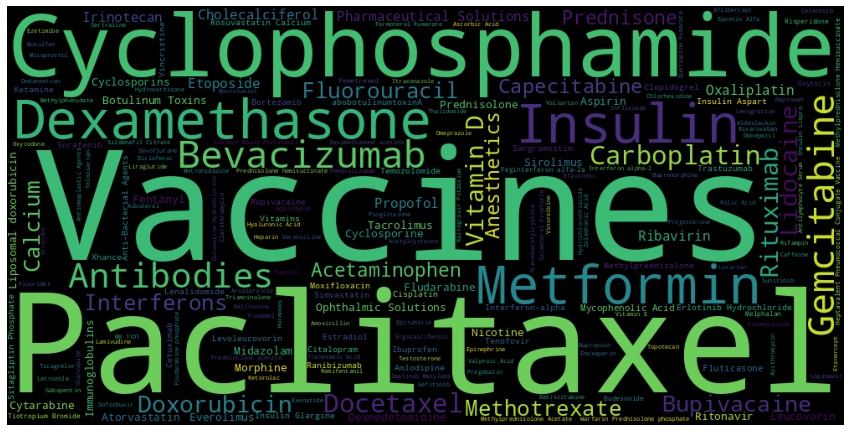

In [0]:
#converting the list to a dictionary with values and its occurences
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
word_could_dict=Counter(interventions_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

## Visualizing the status of clinical trials

In [0]:
#Grouping the data by trials, counting frequencies, then sorting from most frequent to least frequent
status_list = clinical_df.groupBy('Status').count().sort('count', ascending=False)
status_list.show(truncate = False)

+-------------------------+------+
|Status                   |count |
+-------------------------+------+
|Completed                |209749|
|Recruiting               |60950 |
|Unknown status           |44608 |
|Terminated               |22285 |
|Active, not recruiting   |17848 |
|Not yet recruiting       |16499 |
|Withdrawn                |9973  |
|Enrolling by invitation  |3682  |
|Suspended                |1598  |
|No longer available      |39    |
|Approved for marketing   |24    |
|Available                |5     |
|Temporarily not available|1     |
+-------------------------+------+



In [0]:
df = status_list.toPandas()

In [0]:
df

,Status,count
0,Completed,209749
1,Recruiting,60950
2,Unknown status,44608
3,Terminated,22285
4,"Active, not recruiting",17848
5,Not yet recruiting,16499
6,Withdrawn,9973
7,Enrolling by invitation,3682
8,Suspended,1598
9,No longer available,39


In [0]:
Status = list(status_list.toPandas()['Status'])

In [0]:
Status

Out[56]: ['Completed',
 'Recruiting',
 'Unknown status',
 'Terminated',
 'Active, not recruiting',
 'Not yet recruiting',
 'Withdrawn',
 'Enrolling by invitation',
 'Suspended',
 'No longer available',
 'Approved for marketing',
 'Available',
 'Temporarily not available']

In [0]:
Frequency = list(status_list.toPandas()['count'])

In [0]:
Frequency

Out[58]: [209749, 60950, 44608, 22285, 17848, 16499, 9973, 3682, 1598, 39, 24, 5, 1]

In [0]:
my_dict = dict(zip(Status, Frequency))

In [0]:
my_dict

Out[60]: {'Completed': 209749,
 'Recruiting': 60950,
 'Unknown status': 44608,
 'Terminated': 22285,
 'Active, not recruiting': 17848,
 'Not yet recruiting': 16499,
 'Withdrawn': 9973,
 'Enrolling by invitation': 3682,
 'Suspended': 1598,
 'No longer available': 39,
 'Approved for marketing': 24,
 'Available': 5,
 'Temporarily not available': 1}

In [0]:
from math import pi

import pandas as pd

from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum


data = pd.Series(my_dict).reset_index(name='value').rename(columns={'index': 'Status'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(my_dict)]
data['percent'] = data['value'] / sum(my_dict.values()) * 100

p = figure(height=350, title="Pie Chart showing status of clinical trials", toolbar_location=None,
           tools="hover", tooltips=[("Status" ,"@Status") ,("Count" , "@value") , ("Percentage" , "@percent{0.2f} %")], x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Status', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

html = file_html(p, CDN, "Status of Clinical Trials")
displayHTML(html)


<!DOCTYPE html>
 
 
 
 
 
 Status of Clinical Trials